**Задание 1**

Сколько различных категорий имеется в наборе данных 2017 Val annotations, у которых supercategory==animal?

**Задание 2**

Сколько изображений в наборе данных 2017 Val annotations содержит ровно 3 аннотированных человека?

Все данные лежат в директории `/data/`

In [1]:
! ls /data/

annotations  val2017


In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
folder_path = '/data/val2017/'

In [4]:
coco=COCO('/data/annotations/instances_val2017.json')

loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


In [8]:
cats = coco.loadCats(coco.getCatIds())

In [22]:
import pandas as pd
cats = pd.DataFrame(cats)

In [23]:
cats[cats.supercategory == 'animal']

,id,name,supercategory
14,16,bird,animal
15,17,cat,animal
16,18,dog,animal
17,19,horse,animal
18,20,sheep,animal
19,21,cow,animal
20,22,elephant,animal
21,23,bear,animal
22,24,zebra,animal
23,25,giraffe,animal


In [24]:
coco_kps = COCO('/data/annotations/person_keypoints_val2017.json')

loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


In [27]:
cats[cats.supercategory == 'person']

,id,name,supercategory
0,1,person,person


In [35]:
catIds=1

In [36]:
imgIds = coco.getImgIds(catIds=catIds);
imgs = coco.loadImgs(imgIds)

In [61]:
annotated_3 = []
for img in imgs:
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    if len(anns)==3:
        annotated_3.append(img)

In [62]:
len(annotated_3)

268

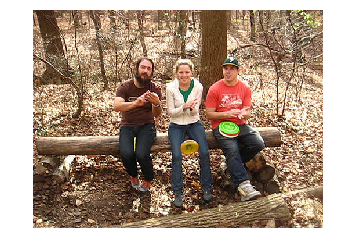

In [71]:
img = annotated_3[20]
I = io.imread(folder_path + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

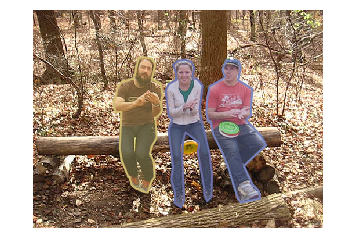

In [72]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

Чтобы отправить  ответы,  запишите их  в формате  json в  файл   result.txt  и положите  его  в корневую директорию

Пример:

In [73]:
res = {'task_1':10, 'task_2': 268}

with open("result.txt", "w") as text_file:
    print(str(res), file=text_file)